In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive')

# Path to the main folder containing subfolders
main_folder_path = '/content/drive/MyDrive/Colab Notebooks/orange'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of images in each category:
pest_psyllid: 24 images
healthy_leaf: 173 images
fungus_penicillium: 43 images
bacteria _citrus: 29 images


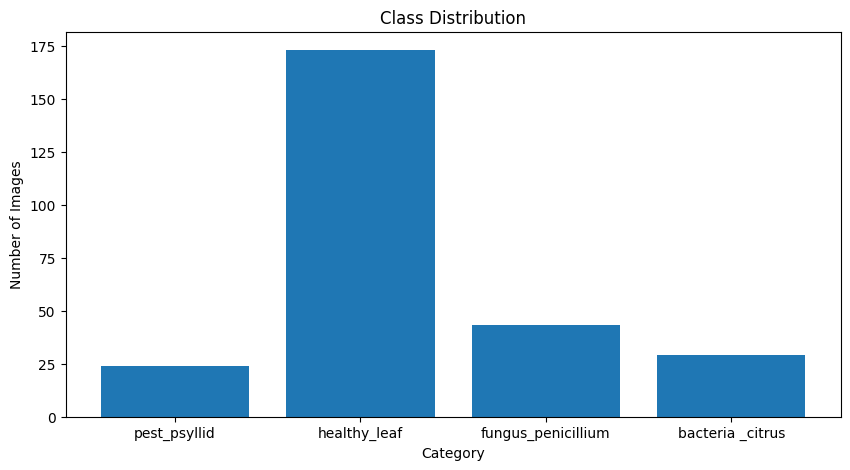

In [ ]:
# Dictionary to hold file paths
image_paths = {
    'pest_psyllid': [],
    'healthy_leaf': [],
    'fungus_penicillium': [],
    'bacteria _citrus': []
}
for category in image_paths.keys():
    folder_path = os.path.join(main_folder_path, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_paths[category].append(os.path.join(folder_path, file_name))

# Check the number of images in each category
category_counts = {category: len(paths) for category, paths in image_paths.items()}
print("Number of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count} images")

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

Sample images from pest_psyllid:


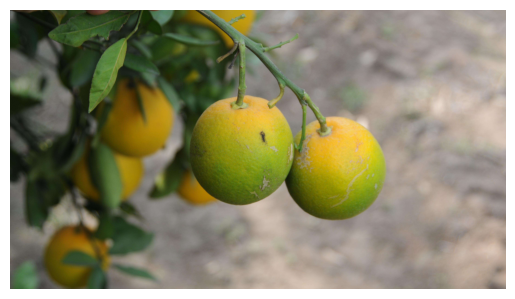

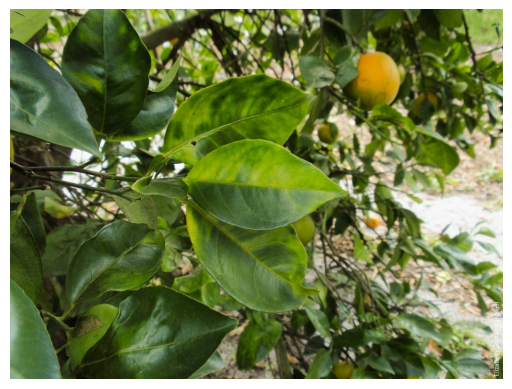

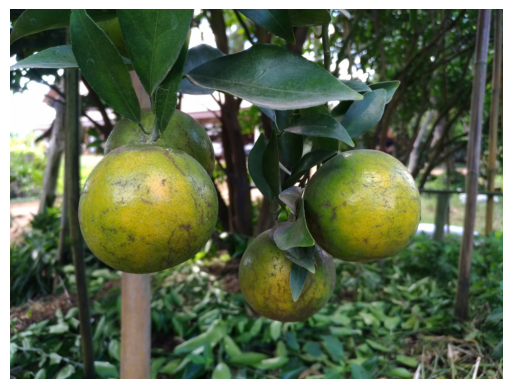

Sample images from healthy_leaf:


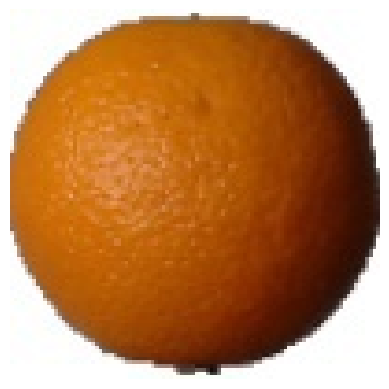

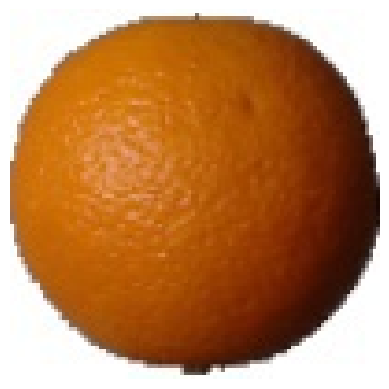

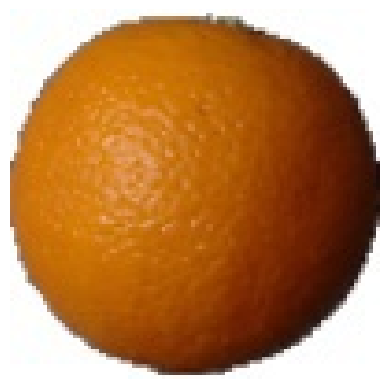

Sample images from fungus_penicillium:


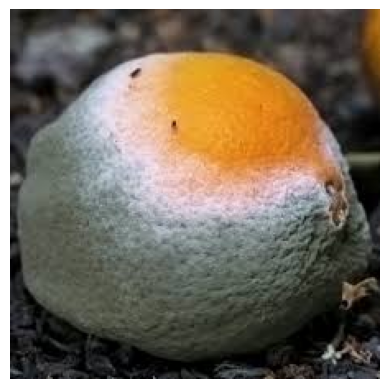

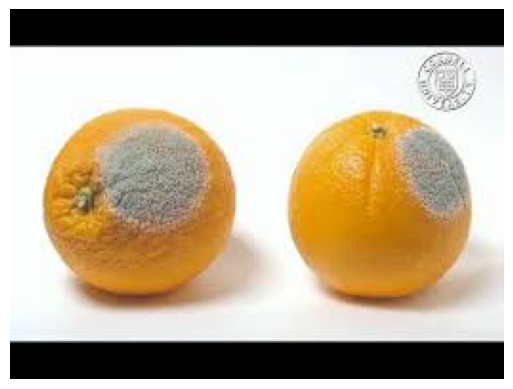

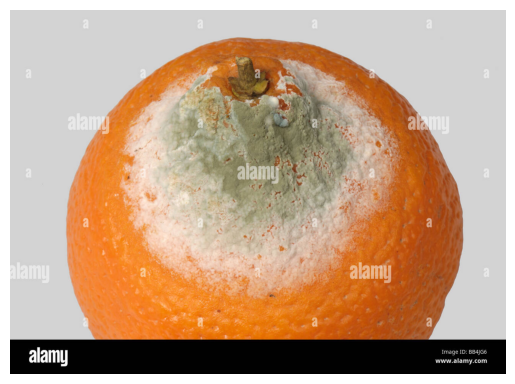

Sample images from bacteria _citrus:


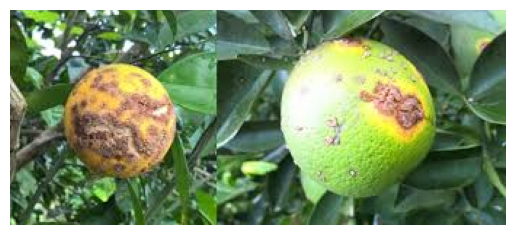

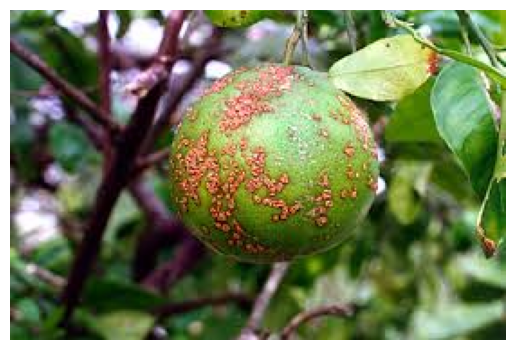

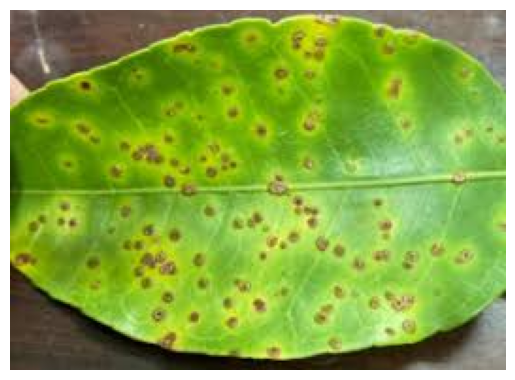

In [ ]:
def load_and_display_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

for category, paths in image_paths.items():
    print(f'Sample images from {category}:')
    for i in range(3):
        load_and_display_image(paths[i])


In [ ]:
import random

# Set a seed for reproducibility
random.seed(42)

# Number of samples per category
num_samples = 100  # You can adjust this number based on your needs

# Sample images from each category
sampled_image_paths = {
    category: random.sample(paths, min(num_samples, len(paths)))
    for category, paths in image_paths.items()
}

# Display the number of sampled images in each category
for category, paths in sampled_image_paths.items():
    print(f'{category}: {len(paths)} sampled images')


pest_psyllid: 24 sampled images
healthy_leaf: 100 sampled images
fungus_penicillium: 43 sampled images
bacteria _citrus: 29 sampled images


In [ ]:
#distribution of image dimensions for sampled images
dimensions = []
labels = []
for category, paths in sampled_image_paths.items():
    for image_file in paths:
        try:
            image = cv2.imread(image_file)
            if image is not None:
                dimensions.append(image.shape[:2])
                labels.append(category)
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")

dimensions_df = pd.DataFrame(dimensions, columns=['Height', 'Width'])
dimensions_df['Category'] = labels

# Display basic statistics of image dimensions
grouped_stats = dimensions_df.groupby('Category').describe()
print(grouped_stats)


                   Height                                               \
                    count        mean         std    min    25%    50%   
Category                                                                 
bacteria _citrus     29.0  192.413793   25.530818  148.0  183.0  191.0   
fungus_penicillium   43.0  504.744186  639.272395  167.0  183.0  225.0   
healthy_leaf        100.0  280.000000  489.897949  100.0  100.0  100.0   
pest_psyllid         24.0  850.625000  709.431543  143.0  319.5  624.0   

                                     Width                                   \
                        75%     max  count         mean          std    min   
Category                                                                      
bacteria _citrus     194.00   259.0   29.0   266.068966    33.441774  195.0   
fungus_penicillium   607.00  4032.0   43.0   622.906977   570.263966  194.0   
healthy_leaf         100.00  1600.0  100.0   232.000000   359.258496  100.0   
pest_ps

**Resizing and normalizing the images (256x256)**

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator

# Define image size
IMG_SIZE = (256, 256)

# Function to preprocess images
def preprocess_image(image_path, img_size=IMG_SIZE):
    img = Image.open(image_path)
    img = img.resize(img_size)
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return img_array

# Preprocess and store images
preprocessed_images = {category: [] for category in image_paths.keys()}

for category, paths in sampled_image_paths.items():
    for img_path in paths:
        preprocessed_images[category].append(preprocess_image(img_path))

print("Image preprocessing completed.")

Image preprocessing completed.


RGB histograms for pest_psyllid:


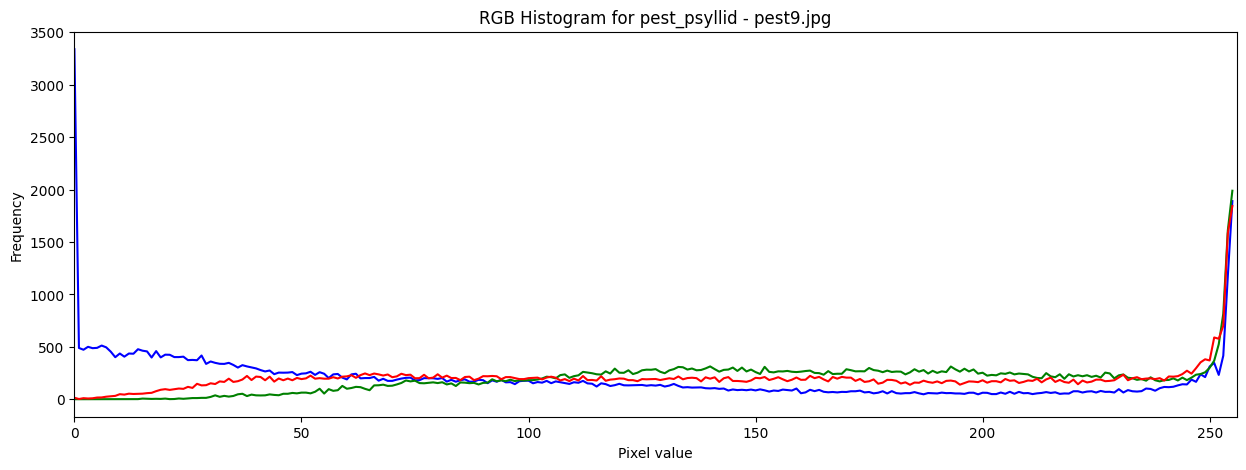

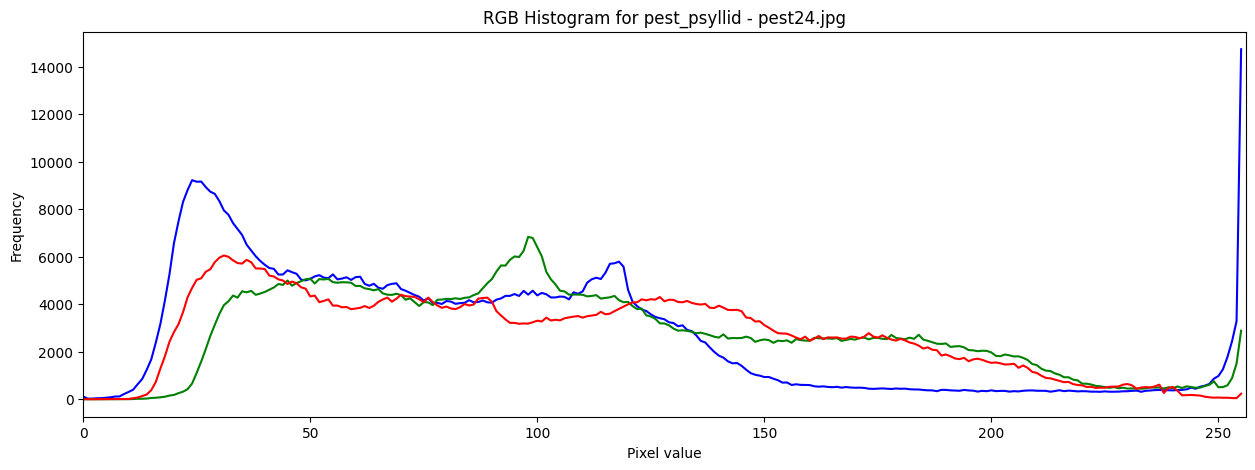

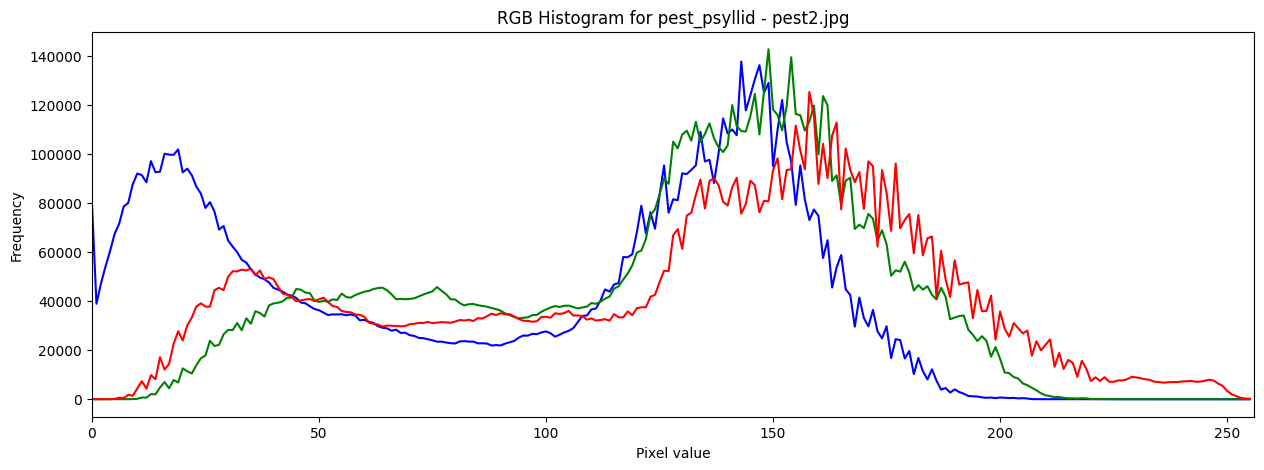

RGB histograms for healthy_leaf:


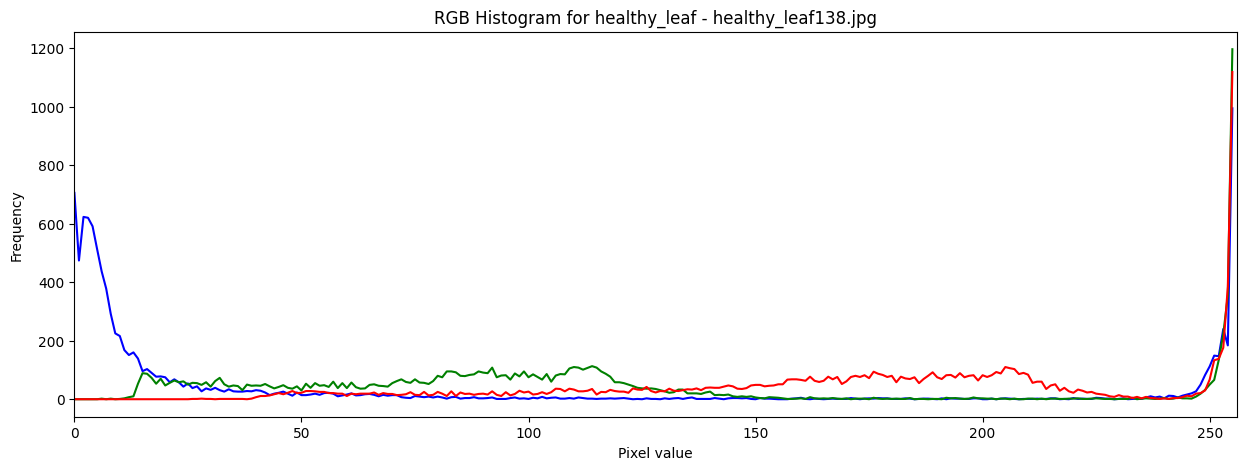

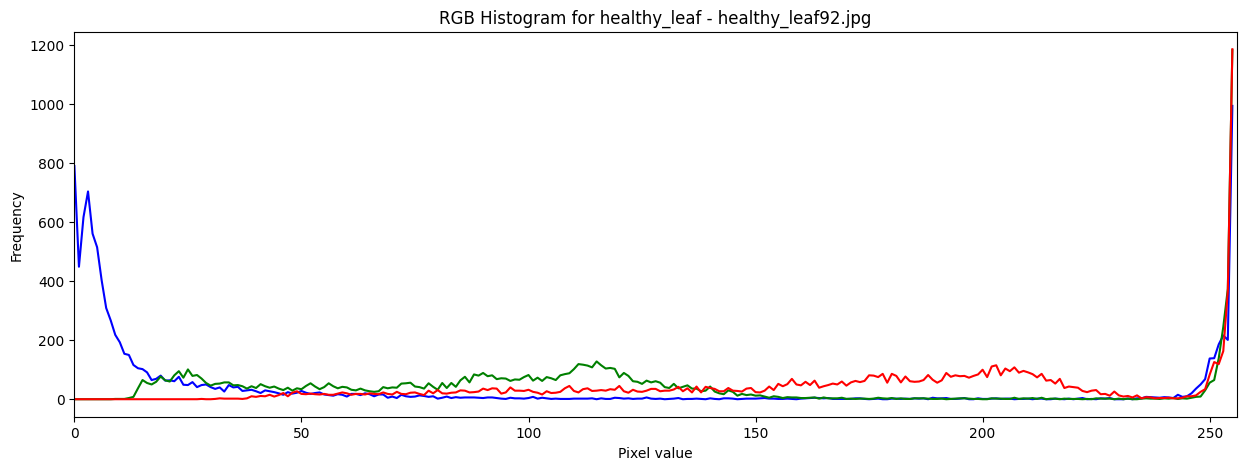

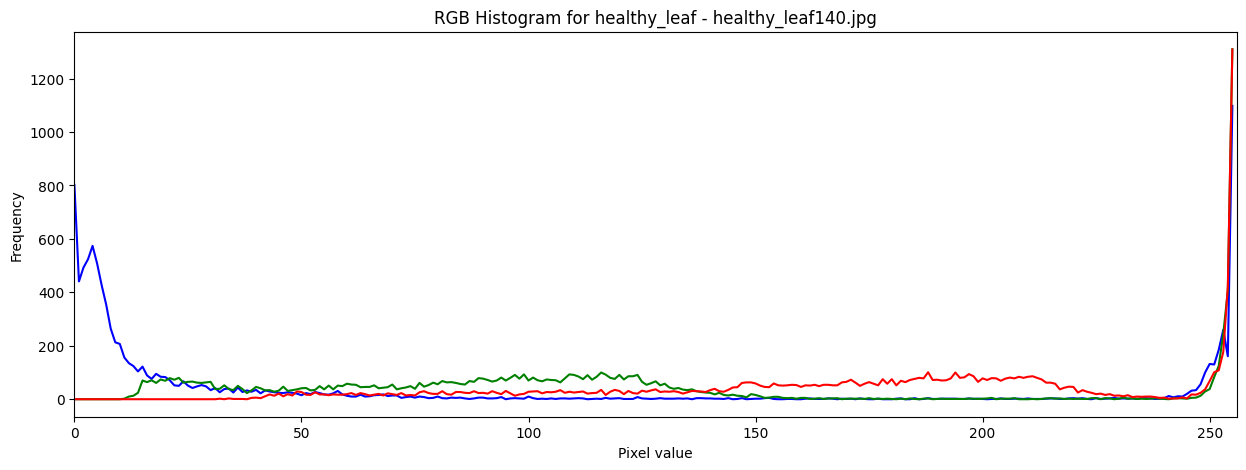

RGB histograms for fungus_penicillium:


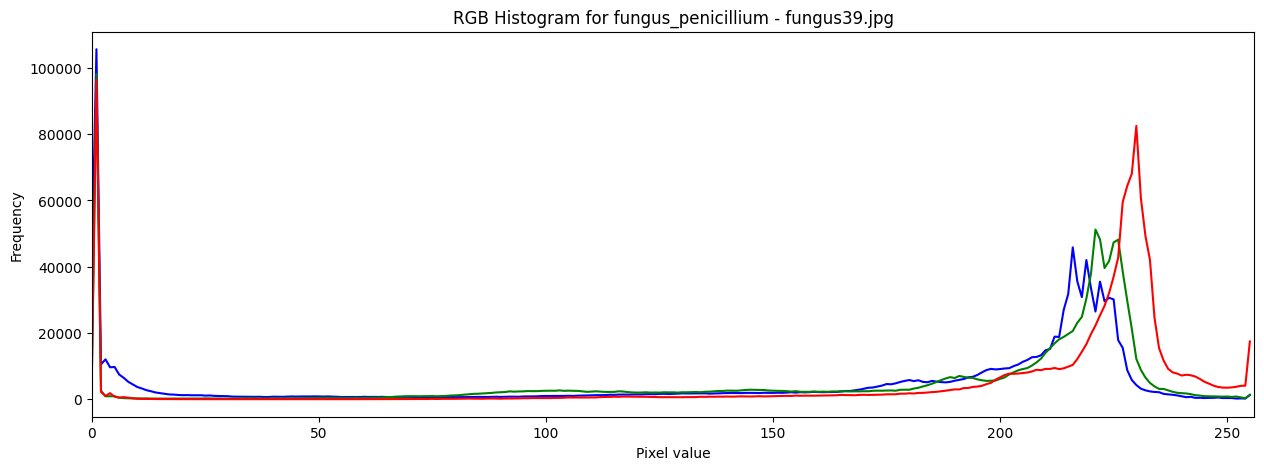

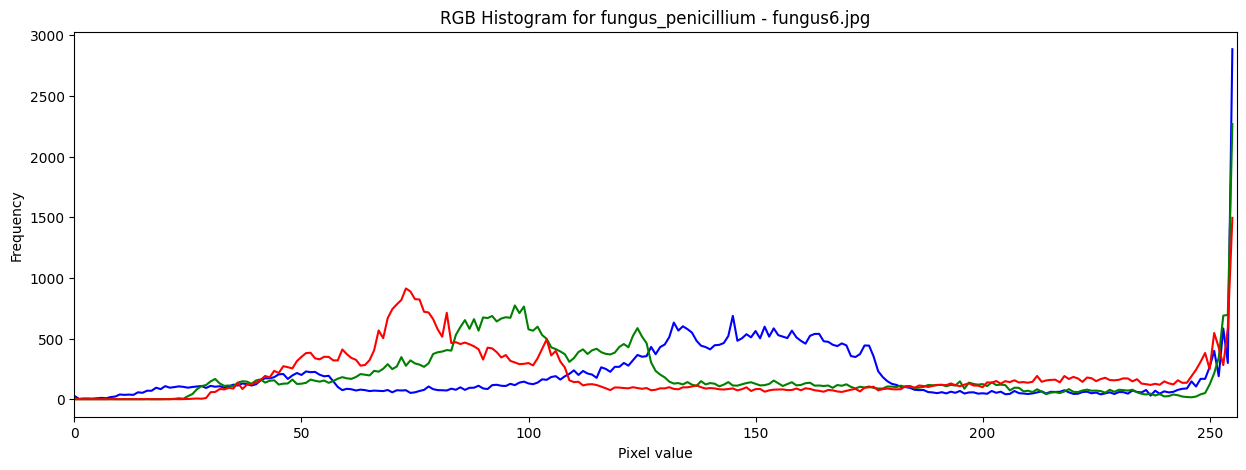

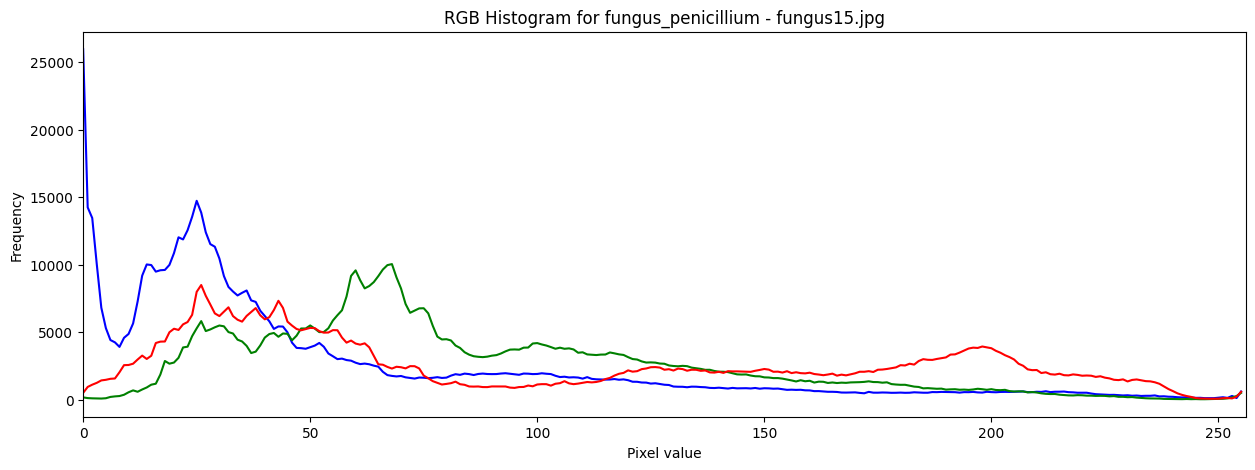

RGB histograms for bacteria _citrus:


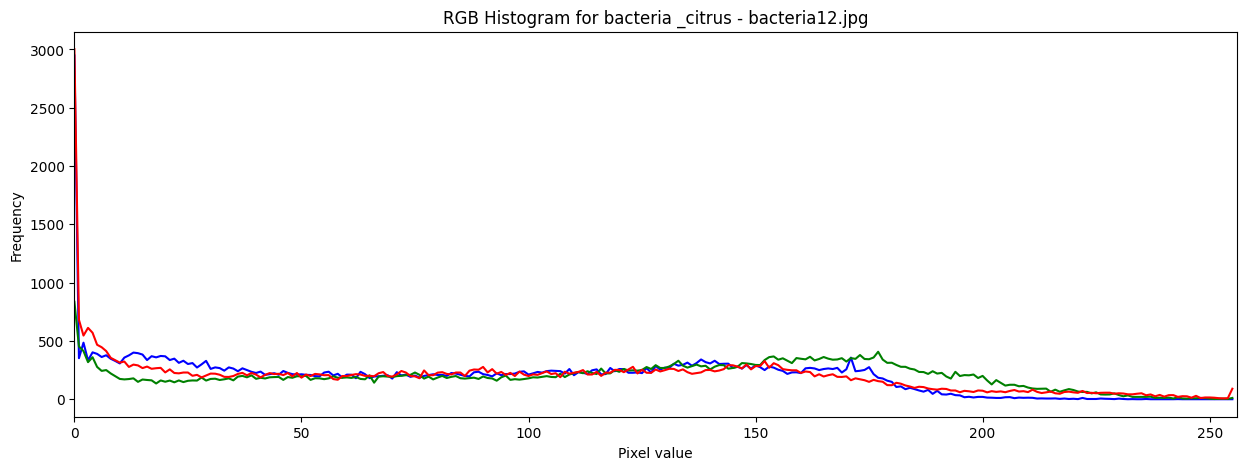

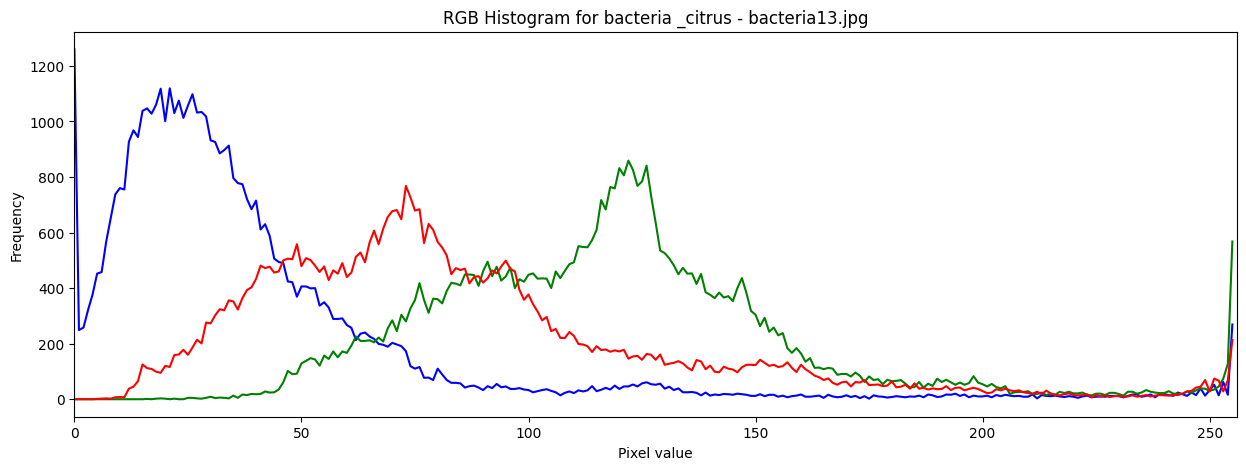

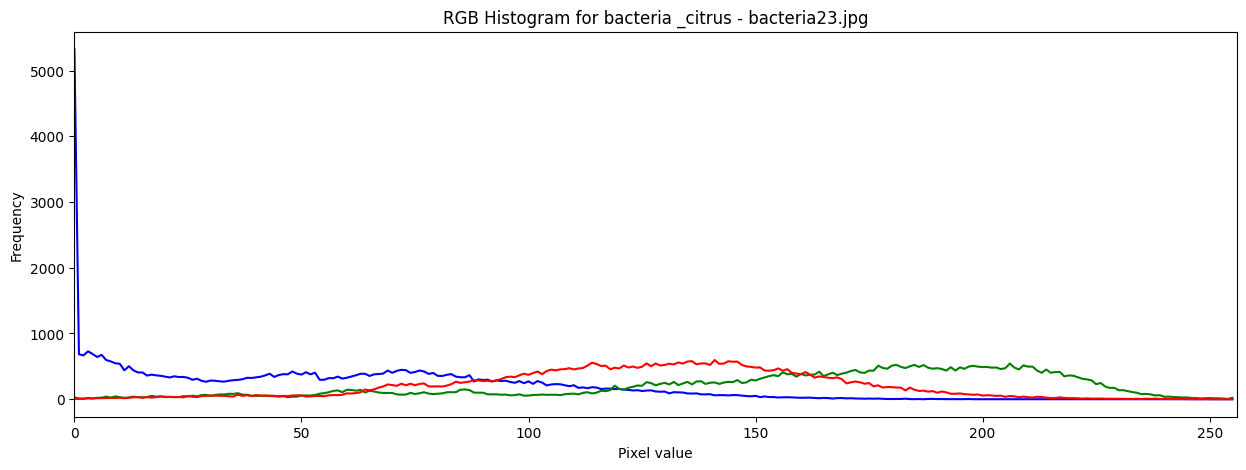

In [ ]:
# Function to plot RGB histograms
def plot_rgb_histograms(image_paths, category):
    for img_path in image_paths[:3]:
        img = cv2.imread(img_path)
        color = ('b', 'g', 'r')
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(color):
            histr = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(histr, color=col)
            plt.xlim([0, 256])
        plt.title(f'RGB Histogram for {category} - {os.path.basename(img_path)}')
        plt.xlabel('Pixel value')
        plt.ylabel('Frequency')
        plt.show()

# Plot RGB histograms for each category
for category, paths in sampled_image_paths.items():
    print(f'RGB histograms for {category}:')
    plot_rgb_histograms(paths, category)

In [ ]:
#Total energy of images
# Function to calculate total energy of an image
def calculate_total_energy(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    energy = np.sum(np.square(img))
    return energy

# Calculate and display total energy for a few sample images from each category
for category, paths in sampled_image_paths.items():
    print(f'Total energy for {category}:')
    for img_path in paths[:3]:
        energy = calculate_total_energy(img_path)
        print(f'{os.path.basename(img_path)}: {energy}')


Total energy for pest_psyllid:
pest9.jpg: 4915428
pest24.jpg: 76401462
pest2.jpg: 1078121307
Total energy for healthy_leaf:
healthy_leaf138.jpg: 794217
healthy_leaf92.jpg: 790598
healthy_leaf140.jpg: 785384
Total energy for fungus_penicillium:
fungus39.jpg: 123938491
fungus6.jpg: 5003642
fungus15.jpg: 72737768
Total energy for bacteria _citrus:
bacteria12.jpg: 5129662
bacteria13.jpg: 5337546
bacteria23.jpg: 5179424


In [ ]:
#Blurriness using Laplacian
# Function to calculate blurriness using Laplacian
def calculate_blurriness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    return laplacian_var

# Calculate and display blurriness for a few sample images from each category
for category, paths in sampled_image_paths.items():
    print(f'Blurriness for {category}:')
    for img_path in paths[:3]:
        blurriness = calculate_blurriness(img_path)
        print(f'{os.path.basename(img_path)}: {blurriness}')

Blurriness for pest_psyllid:
pest9.jpg: 1126.2381338215657
pest24.jpg: 191.51911263708453
pest2.jpg: 8.15852030522575
Blurriness for healthy_leaf:
healthy_leaf138.jpg: 1278.07152991
healthy_leaf92.jpg: 1371.0842747899999
healthy_leaf140.jpg: 1463.3779
Blurriness for fungus_penicillium:
fungus39.jpg: 591.3268747961891
fungus6.jpg: 630.952321970625
fungus15.jpg: 1093.1276447839973
Blurriness for bacteria _citrus:
bacteria12.jpg: 1778.5614845072937
bacteria13.jpg: 457.25339853297663
bacteria23.jpg: 462.410160083549


In [ ]:
image_paths

{'pest_psyllid': ['/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest2.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest21.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest16.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest24.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest1.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest12.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest15.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest20.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest11.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest23.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest13.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest6.jpg',
  '/content/drive/MyDrive/Colab Notebooks/orange/pest_psyllid/pest4.jpg',
  '/content/d

In [ ]:
# Calculate blurriness scores for each category
blurriness_scores = {}
idx = 0
for category, paths in image_paths.items():
    print(f'Calculating blurriness for {category}:')
    scores = [calculate_blurriness(img_path) for img_path in paths]
    blurriness_scores[category] = scores
    print(blurriness_scores)

Calculating blurriness for pest_psyllid:
{'pest_psyllid': [8.15852030522575, 99.34672127939832, 175.05389218709152, 191.51911263708453, 1916.684039684092, 10.658618458529922, 13.443325126156815, 21.806584993184295, 34.59489097804976, 27.78063637508937, 425.31106489376606, 1486.4594442457478, 32.7512115620562, 367.8607912770601, 8615.011392642906, 57.51703656023235, 1093.2794956617286, 158.28084413239444, 606.2745095234158, 1622.0339436884897, 1126.2381338215657, 418.53059532130766, 7561.960057096668, 1876.9863840465748]}
Calculating blurriness for healthy_leaf:
{'pest_psyllid': [8.15852030522575, 99.34672127939832, 175.05389218709152, 191.51911263708453, 1916.684039684092, 10.658618458529922, 13.443325126156815, 21.806584993184295, 34.59489097804976, 27.78063637508937, 425.31106489376606, 1486.4594442457478, 32.7512115620562, 367.8607912770601, 8615.011392642906, 57.51703656023235, 1093.2794956617286, 158.28084413239444, 606.2745095234158, 1622.0339436884897, 1126.2381338215657, 418.53

In [ ]:
from scipy.stats import skew, kurtosis
for category, scores in blurriness_scores.items():
    skewness = skew(scores)
    kurt = kurtosis(scores)

    print(f"\nCategory: {category}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")

    if abs(skewness) > 1 or kurt > 3:
        print("The data has a heavy tail.")
    else:
        print("The data does not have a heavy tail.")


Category: pest_psyllid
Skewness: 2.6406114277514603
Kurtosis: 5.7693483711711515
The data has a heavy tail.

Category: healthy_leaf
Skewness: -2.898324430195162
Kurtosis: 10.433401815864096
The data has a heavy tail.

Category: fungus_penicillium
Skewness: 1.8034026744127625
Kurtosis: 2.7322917354332024
The data has a heavy tail.

Category: bacteria _citrus
Skewness: 0.9123146720039912
Kurtosis: -0.03200386382533127
The data does not have a heavy tail.


In [ ]:
#Calculating noise using MAD# Function to calculate noise using MAD
def calculate_mad(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    median = np.median(img)
    mad = np.median(np.abs(img - median))
    return mad

# Calculate and display MAD for a few sample images from each category
for category, paths in sampled_image_paths.items():
    print(f'MAD (Noise) for {category}:')
    for img_path in paths[:3]:
        mad = calculate_mad(img_path)
        print(f'{os.path.basename(img_path)}: {mad}')

MAD (Noise) for pest_psyllid:
pest9.jpg: 51.0
pest24.jpg: 41.0
pest2.jpg: 31.0
MAD (Noise) for healthy_leaf:
healthy_leaf138.jpg: 35.0
healthy_leaf92.jpg: 39.0
healthy_leaf140.jpg: 38.0
MAD (Noise) for fungus_penicillium:
fungus39.jpg: 12.0
fungus6.jpg: 26.0
fungus15.jpg: 34.0
MAD (Noise) for bacteria _citrus:
bacteria12.jpg: 52.0
bacteria13.jpg: 21.0
bacteria23.jpg: 27.0


In [ ]:
# Calculate number of images needed to match max number of images (healthy leaf)
max_count = max(category_counts.values())
augmentation_counts = {category: max_count - count for category, count in category_counts.items()}

print("Number of augmented images needed for each category:")
for category, count in augmentation_counts.items():
    print(f"{category}: {count} images")


Number of augmented images needed for each category:
pest_psyllid: 149 images
healthy_leaf: 0 images
fungus_penicillium: 130 images
bacteria _citrus: 144 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img

#data augmentation variables
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
import os

# Create directories to save augmented images
augmented_dir = '/content/drive/MyDrive/Colab Notebooks/orange/Augmented'
os.makedirs(augmented_dir, exist_ok=True)

# Function to augment and save images
def augment_images(image_paths, category, num_augmented_images):
    category_dir = os.path.join(augmented_dir, category)
    os.makedirs(category_dir, exist_ok=True)

    augmented_count = 0
    while augmented_count < num_augmented_images:
        for img_path in image_paths:
            if augmented_count >= num_augmented_images:
                break
            img = preprocess_image(img_path)
            img = np.expand_dims(img, axis=0)
            it = datagen.flow(img, batch_size=1)
            for _ in range(num_augmented_images - augmented_count):
                batch = it.next()
                aug_img = array_to_img(batch[0])
                aug_img.save(os.path.join(category_dir, f'aug_{augmented_count}.jpg'))
                augmented_count += 1

# Augment images for each underrepresented category
for category, num_augmented_images in augmentation_counts.items():
    if num_augmented_images > 0:
        print(f"Augmenting {num_augmented_images} images for {category}...")
        augment_images(image_paths[category], category, num_augmented_images)

Augmenting 149 images for pest_psyllid...
Augmenting 130 images for fungus_penicillium...
Augmenting 144 images for bacteria _citrus...


In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/orange/bacteria _citrus'
files = os.listdir(folder_path)

In [ ]:
files
files.sort()
for idx, file_name in enumerate(files, start=1):
#     # Define the new file name
    new_file_name = f'leaf_scorch{idx}.jpg'

#    # Get full paths
    old_file_path = os.path.join(folder_path, file_name)
    new_file_path = os.path.join(folder_path, new_file_name)

#     # Rename the file
    os.rename(old_file_path, new_file_path)

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/orange/bacteria _citrus'
files = os.listdir(folder_path)

In [ ]:
files
files.sort()  # Sort the files to maintain order

# # Rename files sequentially
for idx, file_name in enumerate(files, start=1):
#    # Define the new file name
     new_file_name = f'bacteria{idx}.jpg'

#     # Get full paths
     old_file_path = os.path.join(folder_path, file_name)
     new_file_path = os.path.join(folder_path, new_file_name)
     os.rename(old_file_path, new_file_path)

#     # Rename the file
      #os.rename(old_file_path, new_file_path)